# Data-Driven Approach to Predict the Success of Bank Telemarketing

Input variables:

Age (numeric)

Job: career type (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed')

Marital_Status: marital status (categorical: 'divorced', 'married', 'single'; note: 'divorced' means divorced or widowed)

Education: (categorical: 'PrimaryEducation', 'ProfessionalEducation', 'SecondaryEducation', 'TertiaryEducation')

Default_Credit: has a credit in default? (binary: 'yes', 'no')

Housing_Loan: has a home loan? (binary: 'yes', 'no')

Personal_Loan: has a personal loan? (binary: 'yes', 'no')

Output variable (desired target):

Subscribed - has the client subscribed a long-term deposit? (binary: 'yes', 'no')

# We have used **logistic regression** to predict the outcome of given inputs of customer

In [82]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/success-of-bank-telemarketing-data/Alpha_bank.csv


# The dataset and its visualisation is as follows

In [83]:
data=pd.read_csv("/kaggle/input/success-of-bank-telemarketing-data/Alpha_bank.csv")
data.head()

Age        Job Marital_Status               Education Default_Credit  \
0   56  housemaid        married       Primary_Education             no   
1   37   services        married     Secondary_Education             no   
2   40     admin.        married       Primary_Education             no   
3   56   services        married     Secondary_Education             no   
4   59     admin.        married  Professional_Education             no   

  Housing_Loan Personal_Loan Subscribed  
0           no            no         no  
1          yes            no         no  
2           no            no         no  
3           no           yes         no  
4           no            no         no

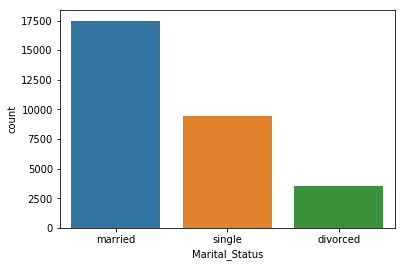

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=data,x="Marital_Status")

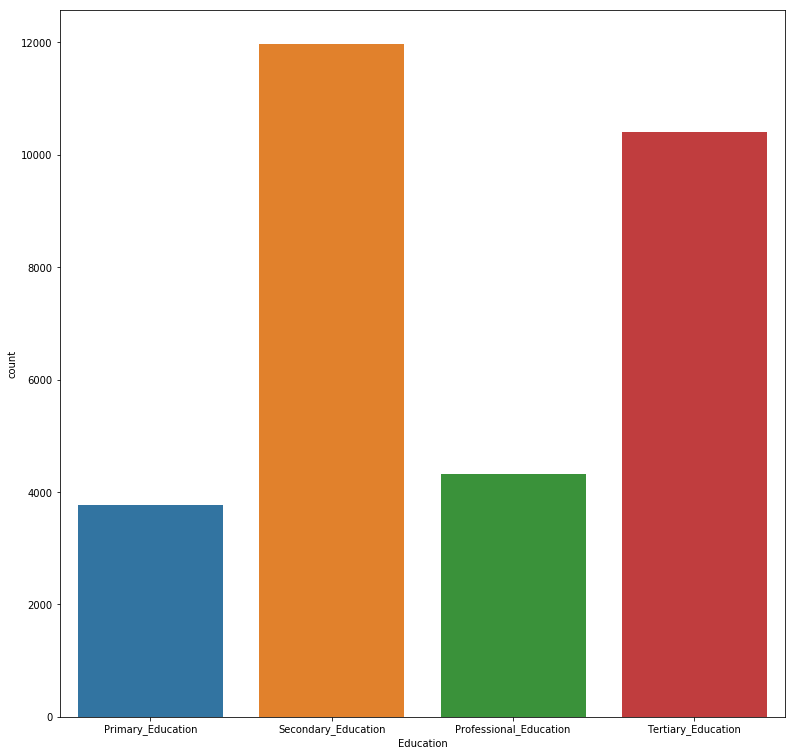

In [85]:
plt.figure(figsize=(13,13))
sns.countplot(data=data,x="Education")

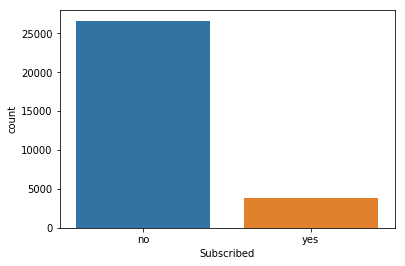

In [86]:
sns.countplot(data=data,x="Subscribed")

The data is ** unbalanced**

In [87]:
x=data.iloc[:,0:7]
y=data.iloc[:,7:]

In [88]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
X=enc.fit_transform(x)
X.shape


(30477, 100)

In [90]:
#Split data Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [91]:
#Logistic Regression
clf = LogisticRegression(solver='lbfgs', C=100, max_iter=250)
clf.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=250,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Result of Model

In [92]:
y_pred=clf.predict(X_test)
print(y_pred)

['no' 'no' 'no' ... 'no' 'no' 'no']


# Model Performance and Confusion Matrix

In [93]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
print(cnf_matrix)
print("model score: %.3f" % clf.score(X_test, y_test))

[[5315   40]
 [ 719   22]]
model score: 0.875


# The visualisation of confusion matrix

In [94]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

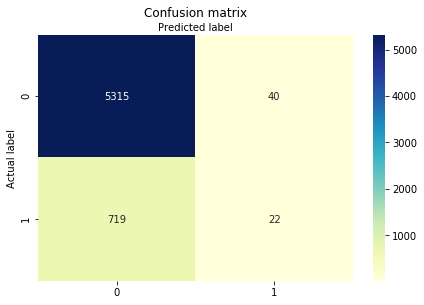

In [95]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## THANKS FOR READÄ°NG